##Bike(BoomBikes) Sharing Assignment
Bhagavantrao Patil

##Steps
1. Reading, understanding, preparing and visualizing the data.
2. Preparing the data for modelling (Cleaning, Scaling, Dummy variables, Train-Test split etc.)
3. Training the model (Using Training dataset).
4. Residual Analysis
5. Using the model for prediction(Using Test dataset).

In this case, the target for the Linear Regression is demand for the bikes. The demand is represented by variable 'cnt'.

In [263]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

###Reading, understanding, preparing and visualizing the data.

In [264]:
# Reading the data
boombikes = pd.read_csv('day.csv')

boombikes.head(15)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0         1  01-01-2018       1   0     1        0        6           0   
1         2  02-01-2018       1   0     1        0        0           0   
2         3  03-01-2018       1   0     1        0        1           1   
3         4  04-01-2018       1   0     1        0        2           1   
4         5  05-01-2018       1   0     1        0        3           1   
5         6  06-01-2018       1   0     1        0        4           1   
6         7  07-01-2018       1   0     1        0        5           1   
7         8  08-01-2018       1   0     1        0        6           0   
8         9  09-01-2018       1   0     1        0        0           0   
9        10  10-01-2018       1   0     1        0        1           1   
10       11  11-01-2018       1   0     1        0        2           1   
11       12  12-01-2018       1   0     1        0        3           1   
12       13  13-01-2018       1   0     1        0        4           1   
13       14  14-01-2018       1   0     1        0        5           1   
14       15  15-01-2018       1   0     1        0        6           0   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0            2  14.110847  18.18125  80.5833  10.749882     331         654   
1            2  14.902598  17.68695  69.6087  16.652113     131         670   
2            1   8.050924   9.47025  43.7273  16.636703     120        1229   
3            1   8.200000  10.60610  59.0435  10.739832     108        1454   
4            1   9.305237  11.46350  43.6957  12.522300      82        1518   
5            1   8.378268  11.66045  51.8261   6.000868      88        1518   
6            2   8.057402  10.44195  49.8696  11.304642     148        1362   
7            2   6.765000   8.11270  53.5833  17.875868      68         891   
8            1   5.671653   5.80875  43.4167  24.250650      54         768   
9            1   6.184153   7.54440  48.2917  14.958889      41        1280   
10           2   6.932731   9.57320  68.6364   8.182844      43        1220   
11           1   7.081807   8.02365  59.9545  20.410009      25        1137   
12           1   6.765000   7.54415  47.0417  20.167000      38        1368   
13           1   6.595670   9.42065  53.7826   8.478716      54        1367   
14           2   9.566653  12.40560  49.8750  10.583521     222        1026   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
5   1606  
6   1510  
7    959  
8    822  
9   1321  
10  1263  
11  1162  
12  1406  
13  1421  
14  1248

In [265]:
# Understanding the data
boombikes.info()

# Observations:
# The data has 16 columns and except for 'dteday' all other columns are numerical.
# The data has 730 entries in total and all are non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [266]:
# Understanding the data
boombikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

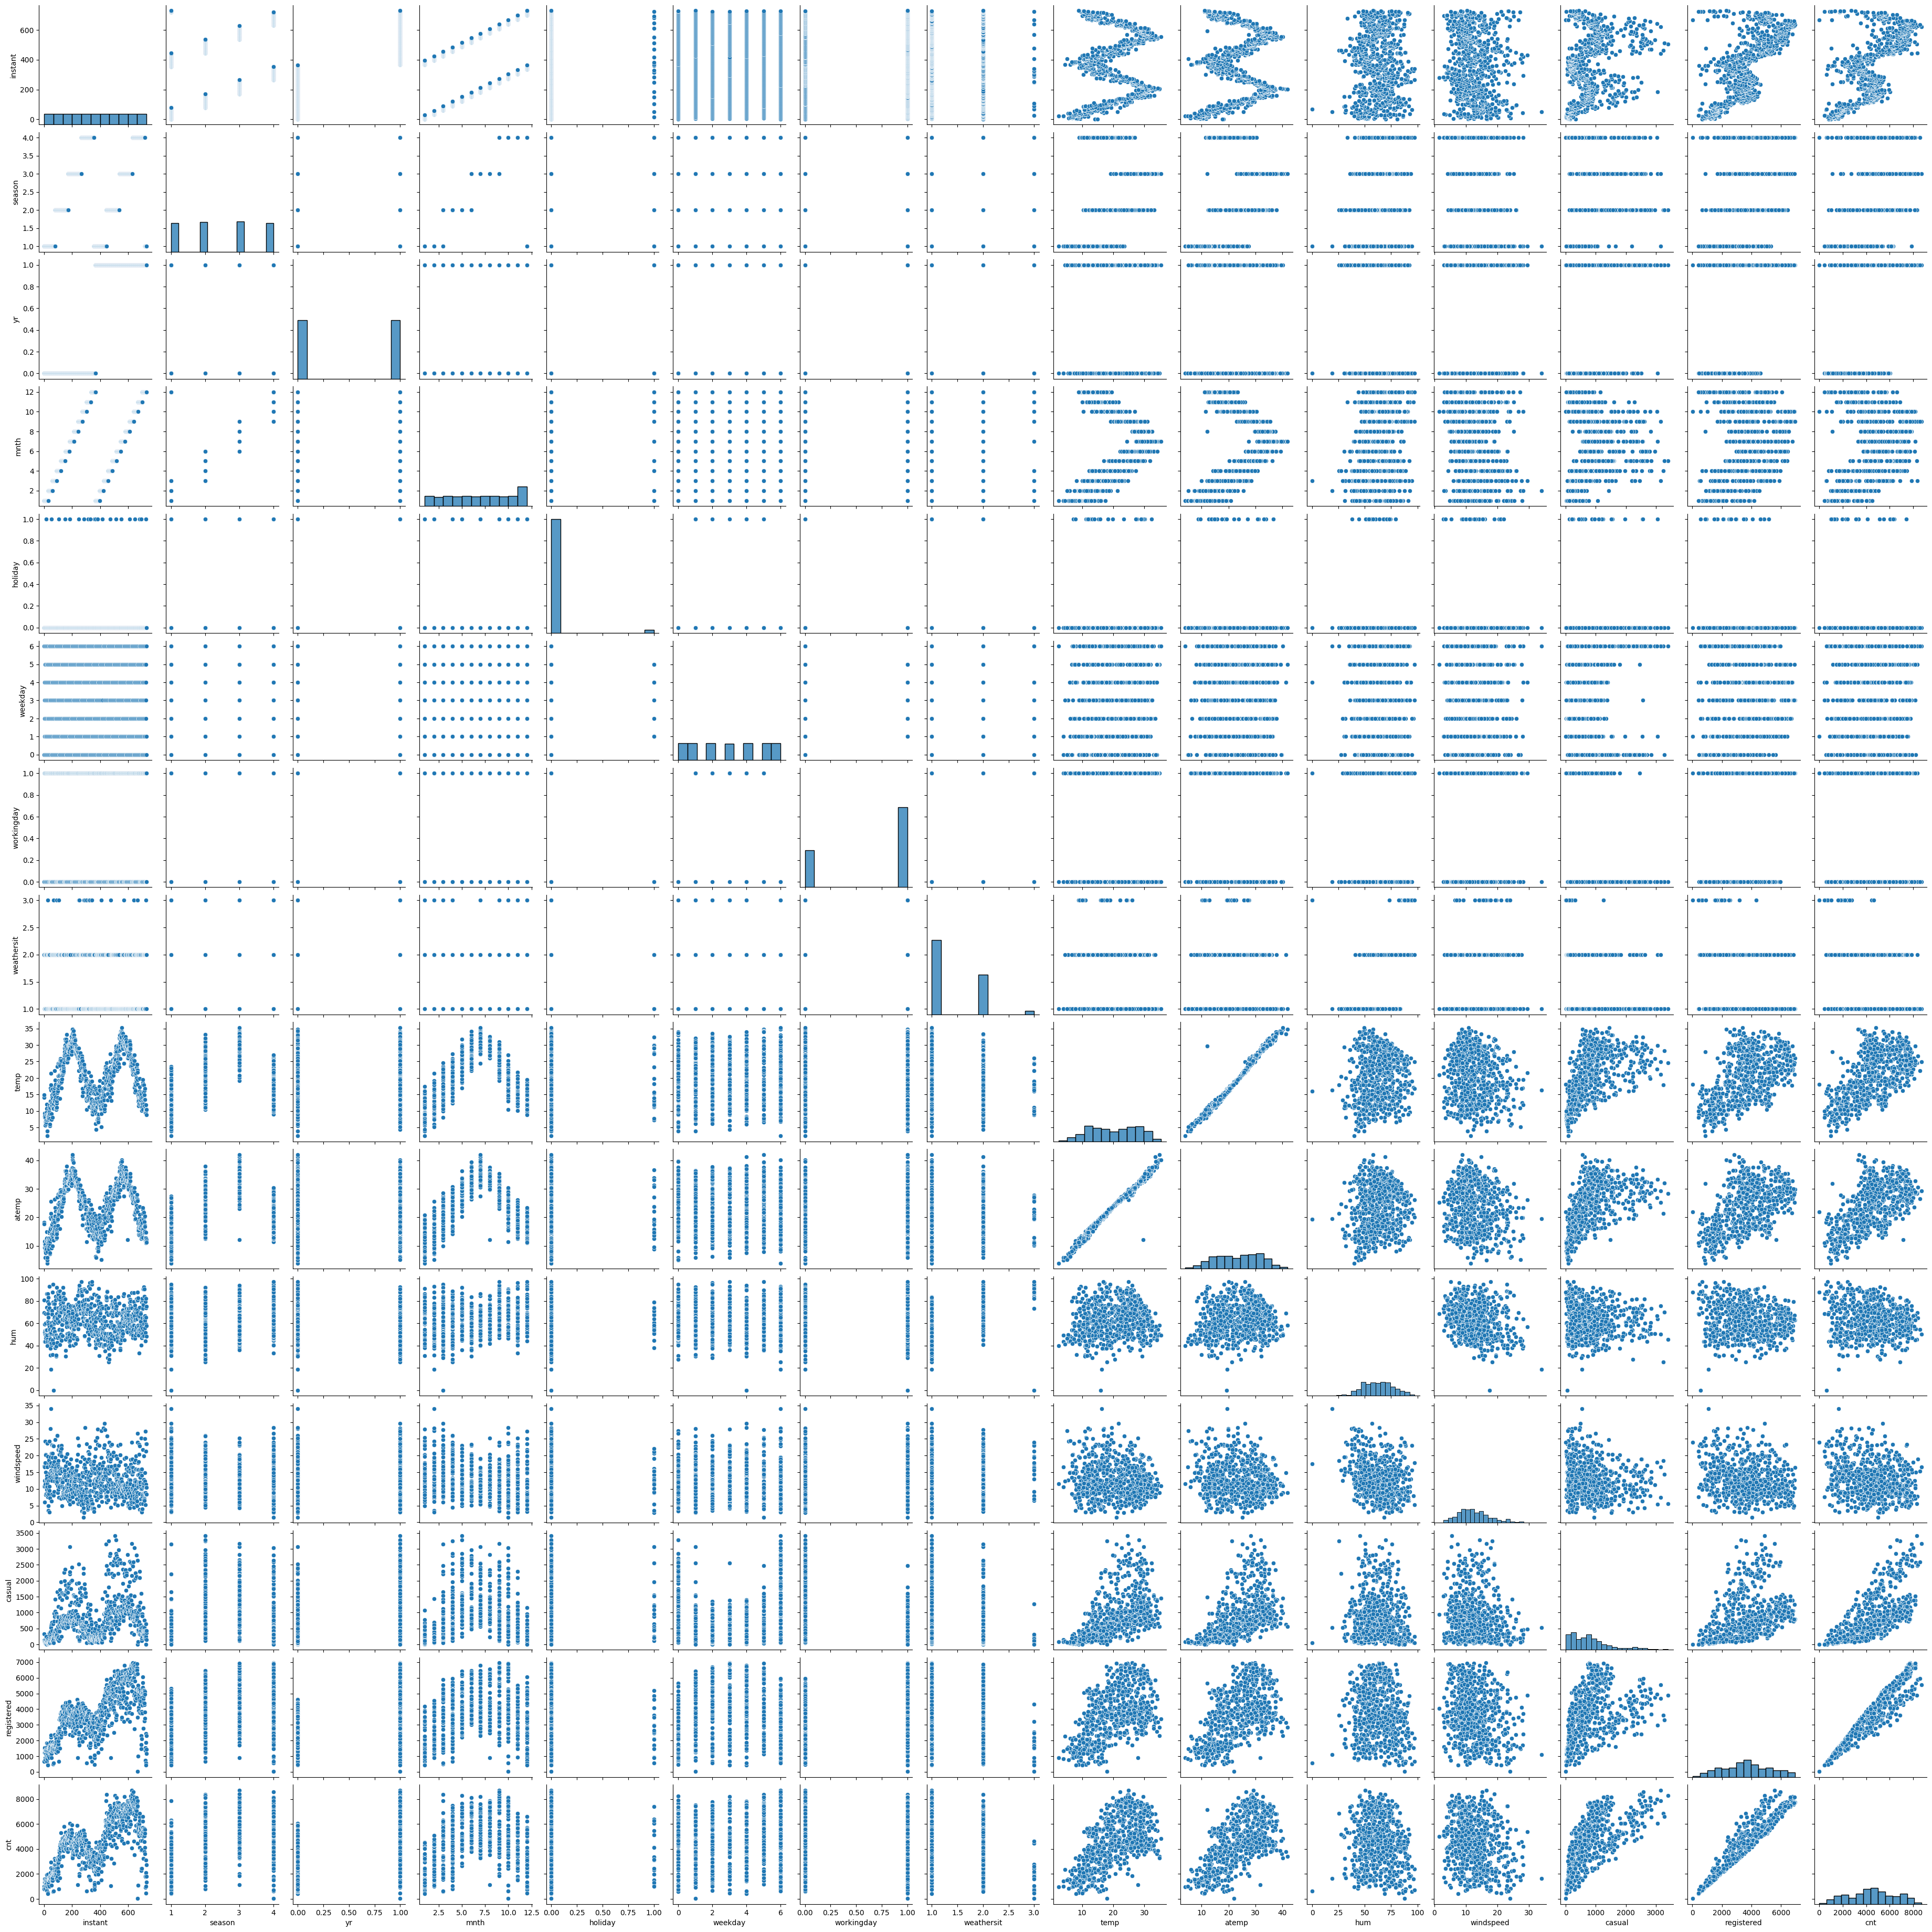

In [267]:
# Visualizing the Numerical variables
sns.pairplot(boombikes)
plt.show()

# The 'cnt' variable seems to have linear relatiionship with 'temp', 'atemp', 'casual, 'registered' based on below charts. Once the categorical variable are
# converted, it would be interesting to recheck

In [268]:
# Preparing the Data

# Few important observations on 'dteday' column:
# 1. Across the world, Saturdays and Sundays are non-working and assuming the first weekday(1st working day of the week is Monday).
# 2. As per above data, the 'dteday' seems to have a mismatch since the date '01-01-1018' as per Gregorian calendar is a Tuesday.
#    which as per above data is flagged as weekday=6 ideally meant for Saturday.
# 3. I can either correct this column but eventually would have transformed it into a weekday like column which already exists. Hence,
#    would prefer dropping this column as it is redundunt as well as misleading.


# Dropping the 'dteday' column as per above explanation and with this change.

boombikes = boombikes.drop(['dteday'], axis=1)
boombikes.head()

instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0        1       1   0     1        0        6           0           2   
1        2       1   0     1        0        0           0           2   
2        3       1   0     1        0        1           1           1   
3        4       1   0     1        0        2           1           1   
4        5       1   0     1        0        3           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

In [269]:
# The column 'instant' is just a record index and should not play any role in analysis hence dropping it.

boombikes = boombikes.drop(['instant'], axis=1)
boombikes.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [270]:
# Dealing with non-binary Categorical variable

# Though all of the variable left now might seem numerical in first glance based on data type but they are not.
# On a closer look, the variables like 'season', 'month', 'weekday', 'weathersit' are actually non-binary categorical in
# nature.and need to be converted into Dummy variable as below

# season --> 1:spring, 2:summer, 3:fall, 4:winter
# month -- > 1:january, 2:february ... 12:december
# weekday --> 1:monday, 2:tuesday ... 6:saturday, 0:sunday
# weathersit: Find more details further while creating dummies for this variable

In [271]:
# Converting the season categorical variable into spring, summer, fall and winter dummy variable.
# Note that initially I had used drop_first but as per discussion with coach in the PI session, it was ok to not drop any
# dummy variable(cited in earlier days memory limitations was the reason fot not using many variables but not in recent times)
# Note: I understand the impact this will have due to multicollinearity however proper variable selection based on R^2,
# p value and VIF for model building should take care of this problem is what I believe!!

seasonDummy = pd.get_dummies(boombikes['season'])
seasonNames = ['spring','summer', 'fall', 'winter']

#Coverting the binary dummy variables values from boolean to numbers 0 and 1
for col,season in zip(seasonDummy, seasonNames):
  seasonDummy[col] = seasonDummy[col].apply(lambda x: 1 if x==True else 0)
  boombikes[season] = seasonDummy[col]

# Now, drop the 'mnth' column
boombikes = boombikes.drop(['season'], axis=1)

boombikes.describe()

yr        mnth     holiday     weekday  workingday  weathersit  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    6.526027    0.028767    2.997260    0.683562    1.394521   
std      0.500343    3.450215    0.167266    2.006161    0.465405    0.544807   
min      0.000000    1.000000    0.000000    0.000000    0.000000    1.000000   
25%      0.000000    4.000000    0.000000    1.000000    0.000000    1.000000   
50%      0.500000    7.000000    0.000000    3.000000    1.000000    1.000000   
75%      1.000000   10.000000    0.000000    5.000000    1.000000    2.000000   
max      1.000000   12.000000    1.000000    6.000000    1.000000    3.000000   

             temp       atemp         hum   windspeed       casual  \
count  730.000000  730.000000  730.000000  730.000000   730.000000   
mean    20.319259   23.726322   62.765175   12.763620   849.249315   
std      7.506729    8.150308   14.237589    5.195841   686.479875   
min      2.424346    3.953480    0.000000    1.500244     2.000000   
25%     13.811885   16.889713   52.000000    9.041650   316.250000   
50%     20.465826   24.368225   62.625000   12.125325   717.000000   
75%     26.880615   30.445775   72.989575   15.625589  1096.500000   
max     35.328347   42.044800   97.250000   34.000021  3410.000000   

        registered          cnt      spring      summer        fall  \
count   730.000000   730.000000  730.000000  730.000000  730.000000   
mean   3658.757534  4508.006849    0.246575    0.252055    0.257534   
std    1559.758728  1936.011647    0.431313    0.434490    0.437576   
min      20.000000    22.000000    0.000000    0.000000    0.000000   
25%    2502.250000  3169.750000    0.000000    0.000000    0.000000   
50%    3664.500000  4548.500000    0.000000    0.000000    0.000000   
75%    4783.250000  5966.000000    0.000000    1.000000    1.000000   
max    6946.000000  8714.000000    1.000000    1.000000    1.000000   

           winter  
count  730.000000  
mean     0.243836  
std      0.429689  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

In [272]:
# Converting the 'mnth' categorical variable into various months

monthDummy = pd.get_dummies(boombikes['mnth'])
monthNames = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

#Coverting the binary dummy variables values from boolean to numbers 0 and 1
for col,month in zip(monthDummy, monthNames):
  monthDummy[col] = monthDummy[col].apply(lambda x: 1 if x==True else 0)
  boombikes[month] = monthDummy[col]

# Now, drop the 'mnth' column
boombikes = boombikes.drop(['mnth'], axis=1)

boombikes.describe()

yr     holiday     weekday  workingday  weathersit        temp  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    2.997260    0.683562    1.394521   20.319259   
std      0.500343    0.167266    2.006161    0.465405    0.544807    7.506729   
min      0.000000    0.000000    0.000000    0.000000    1.000000    2.424346   
25%      0.000000    0.000000    1.000000    0.000000    1.000000   13.811885   
50%      0.500000    0.000000    3.000000    1.000000    1.000000   20.465826   
75%      1.000000    0.000000    5.000000    1.000000    2.000000   26.880615   
max      1.000000    1.000000    6.000000    1.000000    3.000000   35.328347   

            atemp         hum   windspeed       casual  ...         mar  \
count  730.000000  730.000000  730.000000   730.000000  ...  730.000000   
mean    23.726322   62.765175   12.763620   849.249315  ...    0.084932   
std      8.150308   14.237589    5.195841   686.479875  ...    0.278971   
min      3.953480    0.000000    1.500244     2.000000  ...    0.000000   
25%     16.889713   52.000000    9.041650   316.250000  ...    0.000000   
50%     24.368225   62.625000   12.125325   717.000000  ...    0.000000   
75%     30.445775   72.989575   15.625589  1096.500000  ...    0.000000   
max     42.044800   97.250000   34.000021  3410.000000  ...    1.000000   

              apr         may         jun         jul         aug         sep  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.082192    0.084932    0.082192    0.084932    0.084932    0.082192   
std      0.274845    0.278971    0.274845    0.278971    0.278971    0.274845   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              oct         nov         dec  
count  730.000000  730.000000  730.000000  
mean     0.084932    0.082192    0.084932  
std      0.278971    0.274845    0.278971  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [273]:
# Converting the 'weekday' categorical variable into various day

weekdayDummy = pd.get_dummies(boombikes['weekday'])
weekdayNames = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

for col, day in zip(weekdayDummy, weekdayNames):
  weekdayDummy[col] = weekdayDummy[col].apply(lambda x: 1 if x==True else 0)
  boombikes[day] = weekdayDummy[col]

#Now, drop the column 'weekday'
boombikes = boombikes.drop(['weekday'], axis=1)

boombikes.describe()

yr     holiday  workingday  weathersit        temp       atemp  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562    1.394521   20.319259   23.726322   
std      0.500343    0.167266    0.465405    0.544807    7.506729    8.150308   
min      0.000000    0.000000    0.000000    1.000000    2.424346    3.953480   
25%      0.000000    0.000000    0.000000    1.000000   13.811885   16.889713   
50%      0.500000    0.000000    1.000000    1.000000   20.465826   24.368225   
75%      1.000000    0.000000    1.000000    2.000000   26.880615   30.445775   
max      1.000000    1.000000    1.000000    3.000000   35.328347   42.044800   

              hum   windspeed       casual   registered  ...         oct  \
count  730.000000  730.000000   730.000000   730.000000  ...  730.000000   
mean    62.765175   12.763620   849.249315  3658.757534  ...    0.084932   
std     14.237589    5.195841   686.479875  1559.758728  ...    0.278971   
min      0.000000    1.500244     2.000000    20.000000  ...    0.000000   
25%     52.000000    9.041650   316.250000  2502.250000  ...    0.000000   
50%     62.625000   12.125325   717.000000  3664.500000  ...    0.000000   
75%     72.989575   15.625589  1096.500000  4783.250000  ...    0.000000   
max     97.250000   34.000021  3410.000000  6946.000000  ...    1.000000   

              nov         dec         sun         mon         tue         wed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.082192    0.084932    0.143836    0.143836    0.142466    0.141096   
std      0.274845    0.278971    0.351164    0.351164    0.349767    0.348359   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              thu         fri         sat  
count  730.000000  730.000000  730.000000  
mean     0.142466    0.142466    0.143836  
std      0.349767    0.349767    0.351164  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 34 columns]

In [274]:
# Converting the 'weathersit' categorical variable into various weathers

# weathersit: This has 4 categories as per Readme.txt however the data does not seem to have any entry with weather type 4
# see content after '-->' for proposed variable name.
#  	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy --> clearWithFewClouds
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist --> mistyWithFewClouds
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds --> lightSnowRainCloudThunder
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog --> worstWeather (not in the dataset)

weatherDummy = pd.get_dummies(boombikes['weathersit'])
weatherNames = ['clearWithFewClouds', 'mistyWithFewClouds', 'lightSnowRainCloudThunder']

weatherDummy

for col, weather in zip(weatherDummy, weatherNames):
  weatherDummy[col] = weatherDummy[col].apply(lambda x: 1 if x==True else 0)
  boombikes[weather] = weatherDummy[col]

#Now, drop the column 'weekday'
boombikes = boombikes.drop(['weathersit'], axis=1)

boombikes.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.465405    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed       casual   registered          cnt  ...         sun  \
count  730.000000   730.000000   730.000000   730.000000  ...  730.000000   
mean    12.763620   849.249315  3658.757534  4508.006849  ...    0.143836   
std      5.195841   686.479875  1559.758728  1936.011647  ...    0.351164   
min      1.500244     2.000000    20.000000    22.000000  ...    0.000000   
25%      9.041650   316.250000  2502.250000  3169.750000  ...    0.000000   
50%     12.125325   717.000000  3664.500000  4548.500000  ...    0.000000   
75%     15.625589  1096.500000  4783.250000  5966.000000  ...    0.000000   
max     34.000021  3410.000000  6946.000000  8714.000000  ...    1.000000   

              mon         tue         wed         thu         fri         sat  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.143836    0.142466    0.141096    0.142466    0.142466    0.143836   
std      0.351164    0.349767    0.348359    0.349767    0.349767    0.351164   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       clearWithFewClouds  mistyWithFewClouds  lightSnowRainCloudThunder  
count          730.000000          730.000000                 730.000000  
mean             0.634247            0.336986                   0.028767  
std              0.481971            0.473004                   0.167266  
min              0.000000            0.000000                   0.000000  
25%              0.000000            0.000000                   0.000000  
50%              1.000000            0.000000                   0.000000  
75%              1.000000            1.000000                   0.000000  
max              1.000000            1.000000                   1.000000  

[8 rows x 36 columns]

##Now we are at the stage where all derived, dummy variables and in place and having dropped redundunt columns, it is time to peform train-test split and scaling of numerical variables.

In [275]:
# Splitting the dataset into train and test

boombikes_train, boombikes_test = train_test_split(boombikes, test_size=0.7, random_state=100)
boombikes_train.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
519   1        0           1  24.497500  28.91415  48.7083  19.083811    1071   
517   1        0           0  23.916653  28.31440  54.9167  12.499654    2795   
132   0        0           1  21.012500  24.71500  86.3333  12.041575     692   
26    0        0           1   7.995000  10.98500  68.7500   7.627079      15   
291   0        0           1  22.211299  25.69240  89.5217  16.303713     254   

     registered   cnt  ...  sun  mon  tue  wed  thu  fri  sat  \
519        5927  6998  ...    0    1    0    0    0    0    0   
517        5325  8120  ...    0    0    0    0    0    0    1   
132        3413  4105  ...    0    0    0    0    0    1    0   
26          416   431  ...    0    0    0    0    1    0    0   
291        2170  2424  ...    0    0    0    1    0    0    0   

     clearWithFewClouds  mistyWithFewClouds  lightSnowRainCloudThunder  
519                   1                   0                          0  
517                   1                   0                          0  
132                   0                   1                          0  
26                    1                   0                          0  
291                   0                   0                          1  

[5 rows x 36 columns]

In [276]:
# Scaling\Rescaling (Normalization\MinMax Vs Standardization)
#     Normalization\MinMaxScale = (X-Xmin)/(Xmax-Xmin)
#     Standardization = (X-Xmean)/Sigma


# 1. Instantiate an object
scaler = MinMaxScaler()

# Create list of Numerical variables to scale. Note that the binary categorical variable converted to DUMMY numeric variables should not be scaled as 1 means True\Yes and 0 means False\No.
# With scaling of such variable we may loose their meaning and predictability
num_vars = ['temp','atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# 2. Fit and Transform on Data
boombikes_train[num_vars] = scaler.fit_transform(boombikes_train[num_vars])
boombikes_train.describe()

# Now all the columns have values  in the range from 0 to 1, where 0 being min and 1 being maximum

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.474886    0.018265    0.707763    0.511058    0.524314    0.660680   
std      0.500513    0.134214    0.455833    0.256364    0.232365    0.148021   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.283512    0.329197    0.557439   
50%      0.000000    0.000000    1.000000    0.527876    0.549137    0.659880   
75%      1.000000    0.000000    1.000000    0.721646    0.703546    0.766534   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed      casual  registered         cnt  ...         sun  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.327204    0.271460    0.497304    0.510317  ...    0.109589   
std      0.174069    0.219852    0.248199    0.251704  ...    0.313092   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.195154    0.102581    0.303338    0.308851  ...    0.000000   
50%      0.306861    0.232958    0.504384    0.511033  ...    0.000000   
75%      0.413173    0.340503    0.693432    0.701929  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              mon         tue         wed         thu         fri         sat  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.155251    0.114155    0.182648    0.141553    0.132420    0.164384   
std      0.362974    0.318728    0.387263    0.349389    0.339723    0.371472   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       clearWithFewClouds  mistyWithFewClouds  lightSnowRainCloudThunder  
count          219.000000          219.000000                 219.000000  
mean             0.652968            0.315068                   0.031963  
std              0.477117            0.465607                   0.176306  
min              0.000000            0.000000                   0.000000  
25%              0.000000            0.000000                   0.000000  
50%              1.000000            0.000000                   0.000000  
75%              1.000000            1.000000                   0.000000  
max              1.000000            1.000000                   1.000000  

[8 rows x 36 columns]

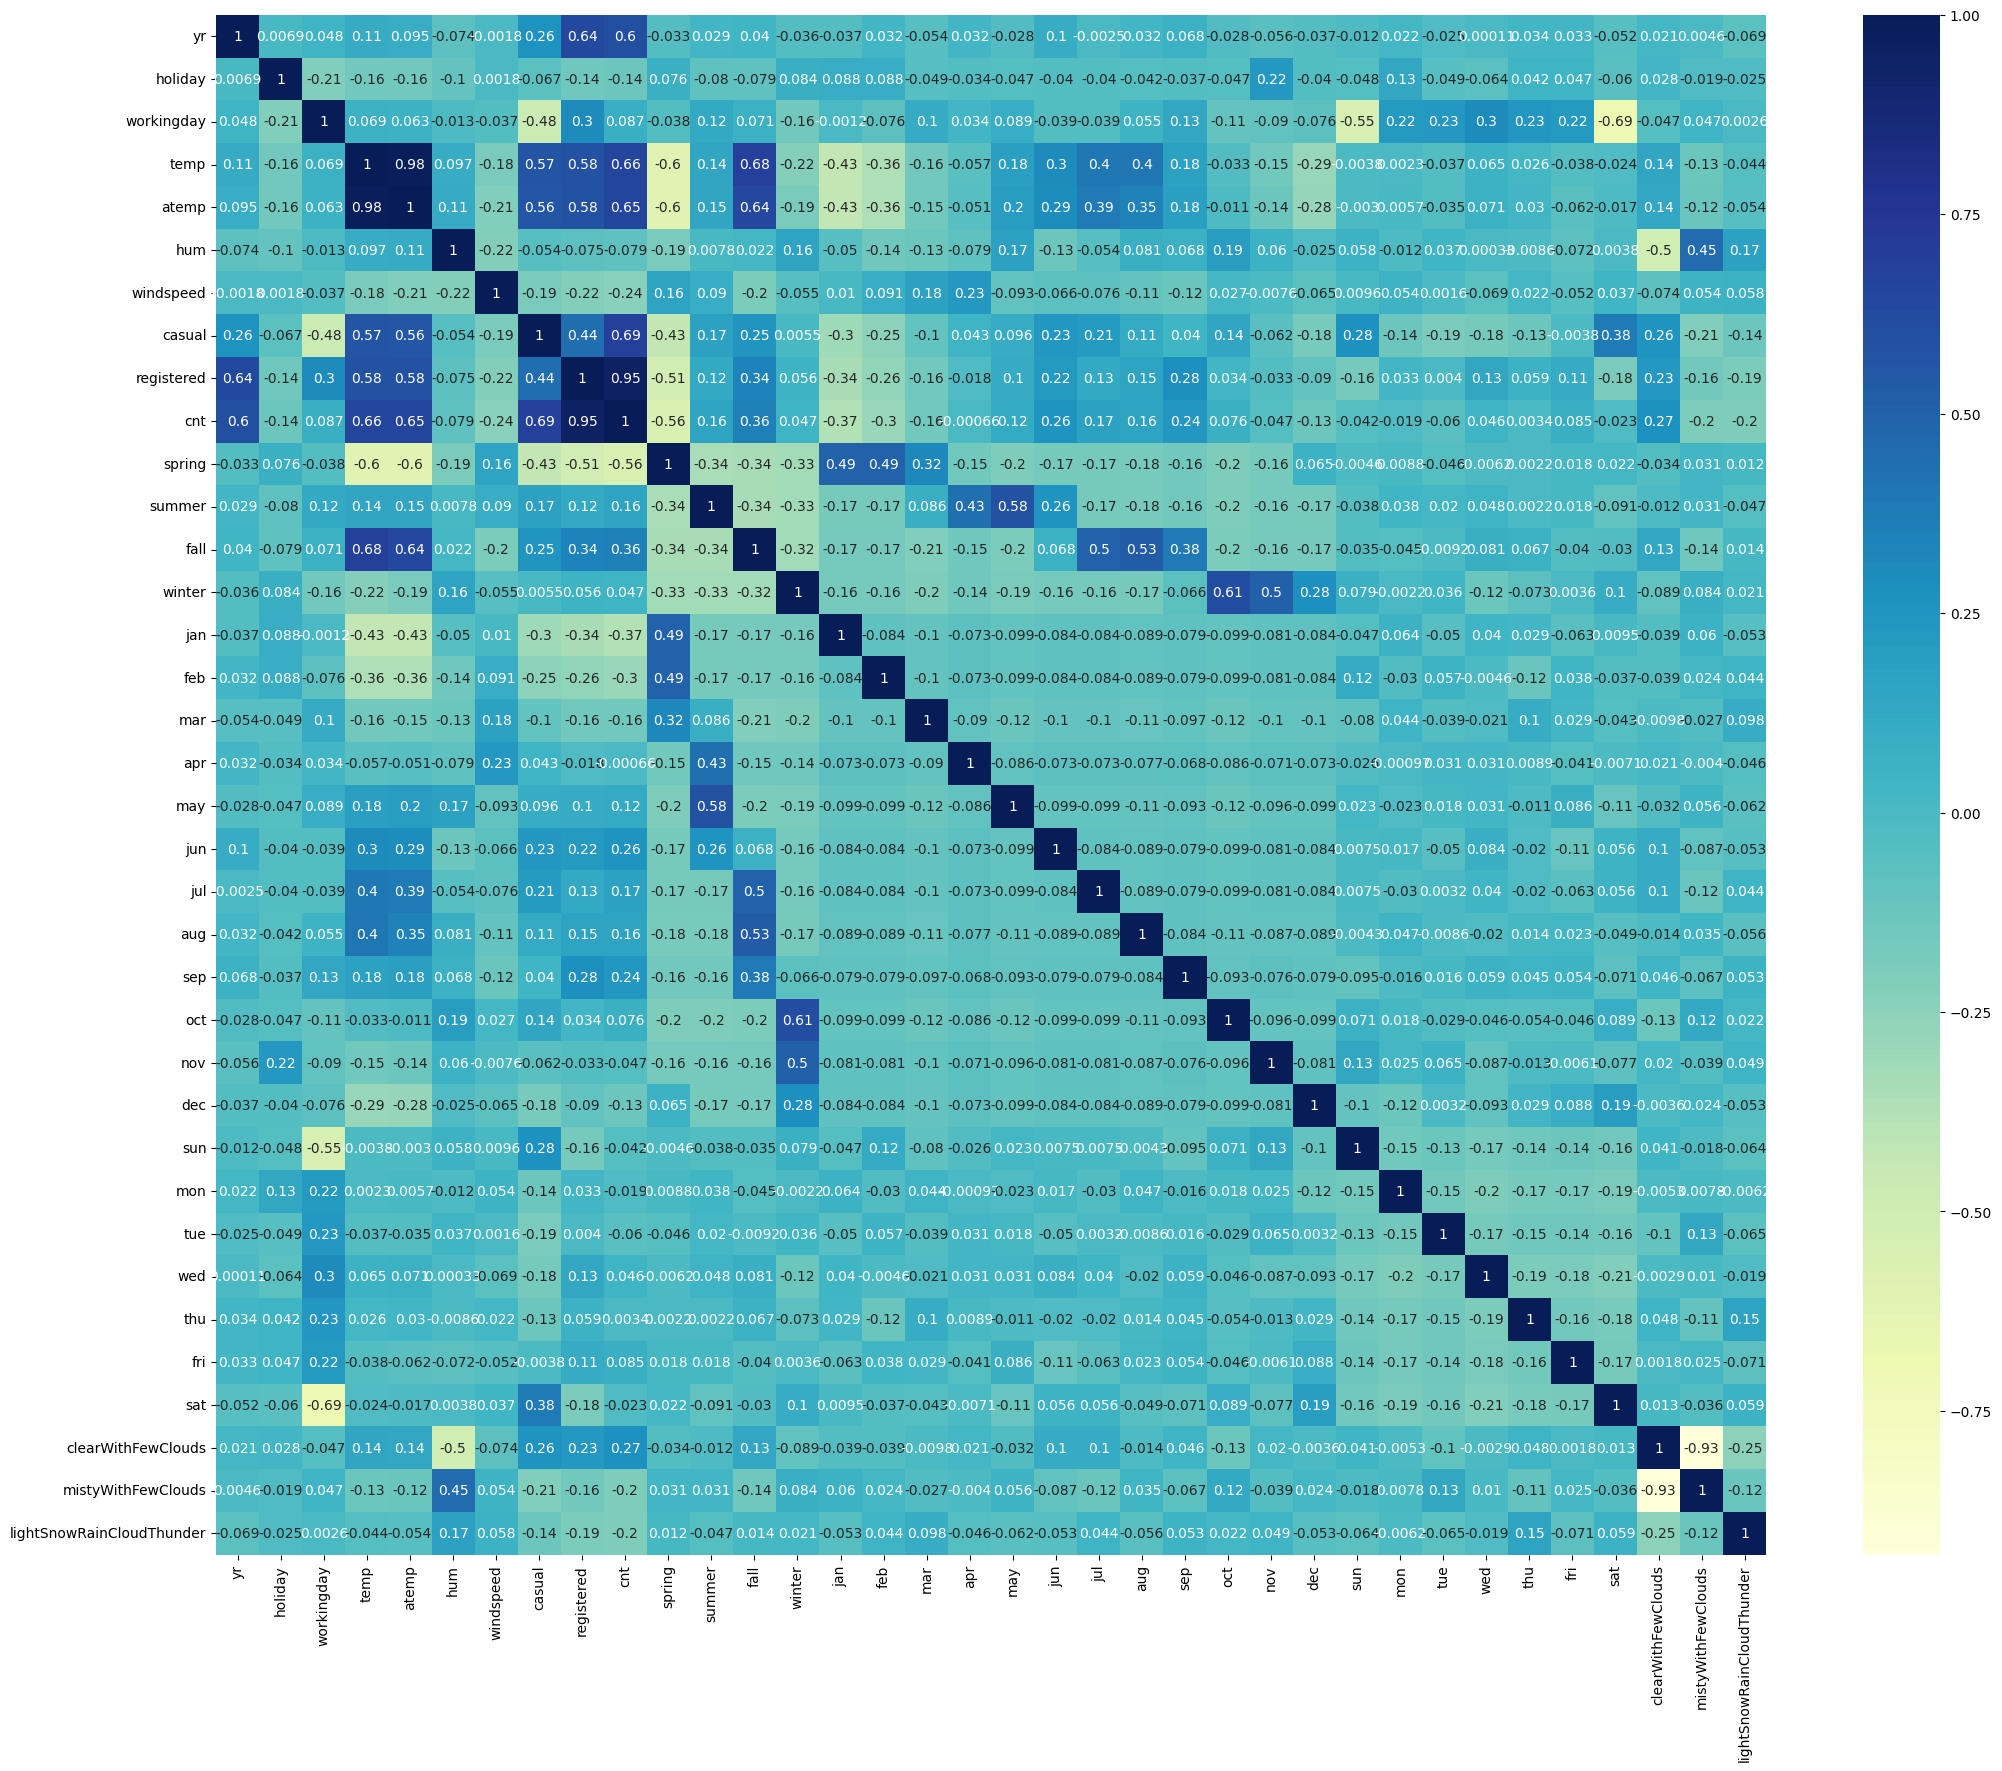

In [277]:
# Before proceeding with the Model building, check the correlation between all the variables w.r.t price to get an overview on which of those have close relationship.
plt.figure(figsize=(25,20))
sns.heatmap(boombikes_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [278]:
# Following are some of the findings as per the heatmap

# 1. weekday: The bike usage\demand('cnt' variable) seems to have considerable positive correlation on weekdays especially
#    on Wednesday, Thursday and Friday. It would be correct to say that most of the usage could be for office commute purpose,
#    the usage seems to be less on weekends and first few days of the week may be due to usage of own vehicles during the weeend
#    spilling into first few days of the week.

# 2. Seasons: The bikes demand seems to have a considerable correlation during fall season followed by summer and winter. The
#    spring season seems to have negative correlation.

# 3. Months: The 6-months span of may to oct seems to have positive correlation where as the other 6-months span nov to apr
#    seems to have negative correlation.

# 4. Weather Situation: The weather situation #1 i.e. 'clearWithFewClouds' seems to have positive correlation with rental bike
#    demand whereas other weather situations have negative correlation.

# 5. temp/atemp: One of these seems to be redundant as both have more or less same positive correlation with the rental bike
#    demand.

# 6. humidity and windspeed: humidity seems to have minor negative correlation where as windspeed seems to have considerable
#    negative correlation with rental bike demand.

# 7. workingday\holiday: workingday seems to have positive correlation where as holiday has negative correlation with rental
#    bike demand. This observation was already proved above with the weekday data above re-confirming the demand for rental
#    bikes to be higher on working weekday.

# 8. yr/year: The year/yr variable seems to have positive correlation with the rental bike demand.

# 9. casual/registered: The casual and registered users seems to be high positive correlation with demand, the registered users
#    having 0.95 value. One of the clue here would be that boombikes needs to try convert the casual users into registered ones.

# Lets see what the Liner regression model has to reveal about the data and would match with above findings i believe

In [279]:
# Defining x and y

# As the predicted variable is 'cnt', it should go in y
y_train = boombikes_train.pop('cnt')
X_train = boombikes_train

X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
519   1        0           1  0.669039  0.687601  0.518413   0.518178   
517   1        0           0  0.648873  0.670296  0.584491   0.305497   
132   0        0           1  0.548043  0.566443  0.918865   0.290701   
26    0        0           1  0.096085  0.170293  0.731722   0.148104   
291   0        0           1  0.589664  0.594644  0.952799   0.428376   

       casual  registered  spring  ...  sun  mon  tue  wed  thu  fri  sat  \
519  0.351423    0.847716       0  ...    0    1    0    0    0    0    0   
517  0.921906    0.755115       0  ...    0    0    0    0    0    0    1   
132  0.226009    0.461006       0  ...    0    0    0    0    0    1    0   
26   0.001985    0.000000       1  ...    0    0    0    0    1    0    0   
291  0.081072    0.269805       0  ...    0    0    0    1    0    0    0   

     clearWithFewClouds  mistyWithFewClouds  lightSnowRainCloudThunder  
519                   1                   0                          0  
517                   1                   0                          0  
132                   0                   1                          0  
26                    1                   0                          0  
291                   0                   0                          1  

[5 rows x 35 columns]

Now is the time to start with the Linear Regression model building. As the predictor variable count is relatively high to begin with manual feature eliminition, I would like to use the Recursive Feature Elimination to get the top 15 variables and then do the manual eliminition to fine tune the model. The RFE will need LinearRegression from sklearn

In [280]:
# creating the model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# List the automatically selected variable details
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 12),
 ('workingday', False, 10),
 ('temp', False, 8),
 ('atemp', True, 1),
 ('hum', False, 5),
 ('windspeed', False, 21),
 ('casual', True, 1),
 ('registered', True, 1),
 ('spring', False, 13),
 ('summer', False, 14),
 ('fall', True, 1),
 ('winter', False, 17),
 ('jan', False, 19),
 ('feb', False, 20),
 ('mar', False, 2),
 ('apr', False, 18),
 ('may', False, 4),
 ('jun', False, 16),
 ('jul', True, 1),
 ('aug', False, 7),
 ('sep', True, 1),
 ('oct', False, 11),
 ('nov', True, 1),
 ('dec', True, 1),
 ('sun', False, 9),
 ('mon', True, 1),
 ('tue', True, 1),
 ('wed', False, 6),
 ('thu', True, 1),
 ('fri', True, 1),
 ('sat', True, 1),
 ('clearWithFewClouds', True, 1),
 ('mistyWithFewClouds', False, 15),
 ('lightSnowRainCloudThunder', False, 3)]

In [281]:
# The variables retained by RFE are:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'atemp', 'casual', 'registered', 'fall', 'jul', 'sep', 'nov',
       'dec', 'mon', 'tue', 'thu', 'fri', 'sat', 'clearWithFewClouds'],
      dtype='object')

In [282]:
# The variables eliminated by RFE are:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'aug', 'oct', 'sun',
       'wed', 'mistyWithFewClouds', 'lightSnowRainCloudThunder'],
      dtype='object')

In [283]:
# Creating the X_train dataset using RFE supported variables
X_train_rfe = X_train[col]

In [284]:
# Adding constant to X_train_rfe
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [285]:
# We are done with coarse selection of variables using RFE for eliminition and now proceeding with fine tuning using manual
# selection of variables.

# Creating and fitting StatsModel so that we can get more detailed statistics on variables to proceed with manual eliminition.
lm = sm.OLS(y_train, X_train_rfe_sm).fit()

In [286]:
# Params
lm.summary()

# The R squared value of this model is extremely high with some variables having p value very high.
# Lets start eliminating some of the variables with high p value first till no variable with p value >0.05 is left after which
# we will start calculating the VIF information to do further eliminition

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.209e+30
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:04:42   Log-Likelihood:                 7398.3
No. Observations:                 219   AIC:                        -1.476e+04
Df Residuals:                     203   BIC:                        -1.471e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0008   1.34e-16  -5.66e+12      0.000      -0.001      -0.001
yr                  3.643e-17   1.14e-16      0.319      0.750   -1.88e-16    2.61e-16
atemp               6.974e-16   3.16e-16      2.205      0.029    7.39e-17    1.32e-15
casual                 0.3810   2.66e-16   1.44e+15      0.000       0.381       0.381
registered             0.8197   3.05e-16   2.69e+15      0.000       0.820       0.820
fall               -2.689e-16   1.35e-16     -1.997      0.047   -5.34e-16   -3.38e-18
jul                 2.032e-16   1.68e-16      1.212      0.227   -1.27e-16    5.34e-16
sep                 2.533e-16   1.73e-16      1.463      0.145    -8.8e-17    5.95e-16
nov                 4.927e-16   1.45e-16      3.408      0.001    2.08e-16    7.78e-16
dec                 3.417e-16   1.53e-16      2.238      0.026    4.07e-17    6.43e-16
mon                 4.328e-16   1.16e-16      3.719      0.000    2.03e-16    6.62e-16
tue                 3.469e-18    1.3e-16      0.027      0.979   -2.54e-16    2.61e-16
thu                 1.394e-16    1.2e-16      1.160      0.247   -9.75e-17    3.76e-16
fri                 3.591e-16   1.23e-16      2.908      0.004    1.16e-16    6.03e-16
sat                 4.129e-16   1.31e-16      3.157      0.002    1.55e-16    6.71e-16
clearWithFewClouds  2.151e-16   8.32e-17      2.586      0.010    5.11e-17    3.79e-16
==============================================================================
Omnibus:                        1.804   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.569
Skew:                          -0.071   Prob(JB):                        0.456
Kurtosis:                       2.610   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [287]:
# Dropping 'tue' variable which has high p value of '0.979' and re-building the model
X_train_new  = X_train_rfe.drop('tue', axis=1)

In [288]:
# Rebuilding the model

X_train_new_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_new_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.554e+29
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:04:42   Log-Likelihood:                 7058.6
No. Observations:                 219   AIC:                        -1.409e+04
Df Residuals:                     204   BIC:                        -1.404e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0008   6.05e-16  -1.25e+12      0.000      -0.001      -0.001
yr                   7.98e-16   5.36e-16      1.489      0.138   -2.59e-16    1.85e-15
atemp                4.51e-17   1.49e-15      0.030      0.976   -2.89e-15    2.98e-15
casual                 0.3810   1.23e-15   3.11e+14      0.000       0.381       0.381
registered             0.8197   1.43e-15   5.74e+14      0.000       0.820       0.820
fall                3.686e-16   6.33e-16      0.582      0.561    -8.8e-16    1.62e-15
jul                  1.75e-16   7.88e-16      0.222      0.825   -1.38e-15    1.73e-15
sep                  4.25e-16   8.14e-16      0.522      0.602   -1.18e-15    2.03e-15
nov                -6.418e-17   6.79e-16     -0.094      0.925    -1.4e-15    1.28e-15
dec                  4.51e-17   7.18e-16      0.063      0.950   -1.37e-15    1.46e-15
mon                 1.674e-16   5.15e-16      0.325      0.746   -8.48e-16    1.18e-15
thu                 2.602e-17   5.34e-16      0.049      0.961   -1.03e-15    1.08e-15
fri                 4.684e-16   5.54e-16      0.845      0.399   -6.24e-16    1.56e-15
sat                 2.064e-16   6.06e-16      0.341      0.734   -9.88e-16     1.4e-15
clearWithFewClouds  4.059e-16    3.9e-16      1.040      0.300   -3.64e-16    1.18e-15
==============================================================================
Omnibus:                       25.380   Durbin-Watson:                   0.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.139
Skew:                          -0.225   Prob(JB):                       0.0104
Kurtosis:                       2.106   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [289]:
# Now the other variables like 'atemp', 'nov', 'dec', 'thu' seems to have risen the p-value. Seems like dropping 'tue' is
# not the right direction. Realised that sum of registered and casual users will directly give 'cnt' which is what we are
# trying to predict hence removing these would be right direction to lean away from overfitting model
X_train_new  = X_train_rfe.drop('registered', axis=1)

In [290]:
# Rebuilding the model

X_train_new_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_new_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     82.70
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           5.84e-76
Time:                        15:04:42   Log-Likelihood:                 199.74
No. Observations:                 219   AIC:                            -369.5
Df Residuals:                     204   BIC:                            -318.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0204      0.025     -0.814      0.417      -0.070       0.029
yr                     0.2238      0.015     15.294      0.000       0.195       0.253
atemp                  0.4830      0.049      9.881      0.000       0.387       0.579
casual                 0.4533      0.050      9.129      0.000       0.355       0.551
fall                  -0.0436      0.025     -1.733      0.085      -0.093       0.006
jul                   -0.0205      0.031     -0.652      0.515      -0.083       0.042
sep                    0.1291      0.031      4.129      0.000       0.067       0.191
nov                    0.0509      0.027      1.889      0.060      -0.002       0.104
dec                    0.0917      0.028      3.278      0.001       0.037       0.147
mon                    0.0231      0.022      1.059      0.291      -0.020       0.066
tue                    0.0366      0.024      1.503      0.134      -0.011       0.085
thu                    0.0162      0.023      0.718      0.474      -0.028       0.061
fri                    0.0555      0.023      2.423      0.016       0.010       0.101
sat                   -0.0806      0.024     -3.370      0.001      -0.128      -0.033
clearWithFewClouds     0.0564      0.015      3.727      0.000       0.027       0.086
==============================================================================
Omnibus:                       22.410   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.142
Skew:                          -0.669   Prob(JB):                     2.85e-07
Kurtosis:                       4.230   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
# Dropping 'registered' variable seems to be the right direction as p value for almost all the variables seems to have fallen
# Let's now drop the 'casual' variable.

X_train_new  = X_train_new.drop('casual', axis=1)

In [292]:
# Rebuilding the model

X_train_new_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_new_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     58.97
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           7.14e-62
Time:                        15:04:43   Log-Likelihood:                 162.23
No. Observations:                 219   AIC:                            -296.5
Df Residuals:                     205   BIC:                            -249.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0664      0.029     -2.282      0.024      -0.124      -0.009
yr                     0.2689      0.016     16.488      0.000       0.237       0.301
atemp                  0.7396      0.047     15.619      0.000       0.646       0.833
fall                  -0.0839      0.029     -2.864      0.005      -0.142      -0.026
jul                   -0.0137      0.037     -0.367      0.714      -0.087       0.060
sep                    0.1285      0.037      3.473      0.001       0.056       0.201
nov                    0.0624      0.032      1.958      0.052      -0.000       0.125
dec                    0.0488      0.033      1.494      0.137      -0.016       0.113
mon                   -0.0145      0.025     -0.570      0.569      -0.064       0.036
tue                   -0.0037      0.028     -0.129      0.897      -0.060       0.052
thu                   -0.0197      0.026     -0.751      0.454      -0.072       0.032
fri                    0.0644      0.027      2.378      0.018       0.011       0.118
sat                    0.0140      0.026      0.547      0.585      -0.036       0.064
clearWithFewClouds     0.0932      0.017      5.395      0.000       0.059       0.127
==============================================================================
Omnibus:                       10.203   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               15.310
Skew:                          -0.282   Prob(JB):                     0.000474
Kurtosis:                       4.166   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
# Dropping 'casual' variable in addition to 'registered' variable seems to have increased p value for more variables. Now lets
# retaining 'registered' and just drop 'casual' variable to see the results.

X_train_new  = X_train_rfe.drop('casual', axis=1)

In [294]:
# Rebuilding the model

X_train_new_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_new_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     326.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.67e-131
Time:                        15:04:43   Log-Likelihood:                 336.95
No. Observations:                 219   AIC:                            -643.9
Df Residuals:                     204   BIC:                            -593.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0379      0.013     -2.881      0.004      -0.064      -0.012
yr                     0.0254      0.011      2.242      0.026       0.003       0.048
atemp                  0.1873      0.029      6.471      0.000       0.130       0.244
registered             0.8641      0.031     28.319      0.000       0.804       0.924
fall                  -0.0312      0.013     -2.336      0.020      -0.058      -0.005
jul                    0.0068      0.017      0.405      0.686      -0.026       0.040
sep                   -0.0075      0.017     -0.429      0.668      -0.042       0.027
nov                    0.0068      0.015      0.470      0.639      -0.022       0.035
dec                   -0.0407      0.015     -2.699      0.008      -0.070      -0.011
mon                   -0.0325      0.011     -2.834      0.005      -0.055      -0.010
tue                   -0.0355      0.013     -2.762      0.006      -0.061      -0.010
thu                   -0.0308      0.012     -2.591      0.010      -0.054      -0.007
fri                    0.0044      0.012      0.355      0.723      -0.020       0.029
sat                    0.0831      0.012      7.049      0.000       0.060       0.106
clearWithFewClouds     0.0275      0.008      3.385      0.001       0.011       0.044
==============================================================================
Omnibus:                       29.723   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.777
Skew:                           0.885   Prob(JB):                     3.80e-09
Kurtosis:                       4.056   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [295]:
# Dropping only casual variable seems to yield better result than dropping only registered or both casual and registered.
# Lets proceed with dropping other variables having high p value with retaining 'registered' variable.

# Lets drop 'fri' which has highest p value of 0.723
X_train_new  = X_train_new.drop('fri', axis=1)


In [296]:
# Rebuilding the model

X_train_new_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_new_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     352.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.04e-132
Time:                        15:04:43   Log-Likelihood:                 336.88
No. Observations:                 219   AIC:                            -645.8
Df Residuals:                     205   BIC:                            -598.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0365      0.013     -2.916      0.004      -0.061      -0.012
yr                     0.0249      0.011      2.221      0.027       0.003       0.047
atemp                  0.1859      0.029      6.494      0.000       0.129       0.242
registered             0.8660      0.030     28.864      0.000       0.807       0.925
fall                  -0.0312      0.013     -2.339      0.020      -0.057      -0.005
jul                    0.0068      0.017      0.402      0.688      -0.026       0.040
sep                   -0.0074      0.017     -0.426      0.670      -0.042       0.027
nov                    0.0067      0.014      0.461      0.645      -0.022       0.035
dec                   -0.0402      0.015     -2.684      0.008      -0.070      -0.011
mon                   -0.0338      0.011     -3.131      0.002      -0.055      -0.013
tue                   -0.0369      0.012     -3.029      0.003      -0.061      -0.013
thu                   -0.0322      0.011     -2.873      0.004      -0.054      -0.010
sat                    0.0818      0.011      7.294      0.000       0.060       0.104
clearWithFewClouds     0.0274      0.008      3.378      0.001       0.011       0.043
==============================================================================
Omnibus:                       29.277   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.985
Skew:                           0.877   Prob(JB):                     5.65e-09
Kurtosis:                       4.041   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
# Dropping 'fri' variable seems to have increased p value for some of the other variables. I would like to re consider using
# RFE to reduce the variables and limit to 10 for automatic selection and then retry manual selection\dropping.

# creating the model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# List the automatically selected variable details
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 17),
 ('workingday', False, 15),
 ('temp', False, 13),
 ('atemp', True, 1),
 ('hum', False, 10),
 ('windspeed', False, 26),
 ('casual', True, 1),
 ('registered', True, 1),
 ('spring', False, 18),
 ('summer', False, 19),
 ('fall', False, 4),
 ('winter', False, 22),
 ('jan', False, 24),
 ('feb', False, 25),
 ('mar', False, 7),
 ('apr', False, 23),
 ('may', False, 9),
 ('jun', False, 21),
 ('jul', True, 1),
 ('aug', False, 12),
 ('sep', False, 2),
 ('oct', False, 16),
 ('nov', True, 1),
 ('dec', False, 5),
 ('sun', False, 14),
 ('mon', False, 6),
 ('tue', False, 3),
 ('wed', False, 11),
 ('thu', True, 1),
 ('fri', True, 1),
 ('sat', True, 1),
 ('clearWithFewClouds', True, 1),
 ('mistyWithFewClouds', False, 20),
 ('lightSnowRainCloudThunder', False, 8)]

In [298]:
# Creating and fitting StatsModel so that we can get more detailed statistics on variables to proceed with manual eliminition.
col = X_train.columns[rfe.support_]

# Creating the x_train dataset using RFE supported variables
X_train_rfe = X_train[col]

# Adding constant to x_train_rfe
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# We are done with coarse reselection of variables using RFE for eliminition and now proceeding with fine tuning using manual
# selection of variables.
lm = sm.OLS(y_train, X_train_rfe_sm).fit()

In [299]:
# Params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.822e+30
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:04:43   Log-Likelihood:                 7337.1
No. Observations:                 219   AIC:                        -1.465e+04
Df Residuals:                     208   BIC:                        -1.461e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0008   1.53e-16  -4.96e+12      0.000      -0.001      -0.001
yr                  4.857e-17   1.45e-16      0.334      0.739   -2.38e-16    3.35e-16
atemp              -4.857e-17   3.52e-16     -0.138      0.890   -7.42e-16    6.45e-16
casual                 0.3810   3.26e-16   1.17e+15      0.000       0.381       0.381
registered             0.8197   3.72e-16    2.2e+15      0.000       0.820       0.820
jul                 2.125e-16   1.95e-16      1.090      0.277   -1.72e-16    5.97e-16
nov                 5.378e-17   1.86e-16      0.289      0.773   -3.13e-16    4.21e-16
thu                -1.457e-16   1.42e-16     -1.026      0.306   -4.26e-16    1.34e-16
fri                 3.643e-17   1.48e-16      0.246      0.806   -2.56e-16    3.29e-16
sat                 8.847e-17   1.58e-16      0.561      0.575   -2.22e-16    3.99e-16
clearWithFewClouds   5.69e-16   1.08e-16      5.284      0.000    3.57e-16    7.81e-16
==============================================================================
Omnibus:                       88.644   Durbin-Watson:                   0.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.222
Skew:                           0.439   Prob(JB):                     6.70e-05
Kurtosis:                       1.845   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Strategy to follow for dropping variables
Variable having:
1. High 'p' and VIF value [No brainer, drop the variable]
2. Low 'p' and low VIF value [Again no-brainer, retain the variable]
3. High-Low case:
- High 'p' value and low VIF (drop this first as this lower change VIF for other variables)
- Low 'p' value and high VIF (drop this after above)

In [300]:
# Calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features    VIF
3          registered  19.10
1               atemp  12.47
2              casual   5.27
0                  yr   4.34
9  clearWithFewClouds   2.95
8                 sat   1.60
4                 jul   1.27
6                 thu   1.26
7                 fri   1.23
5                 nov   1.08

In [301]:
# As 'atemp' is high p value and high VIF, drop it first

X_train_new  = X_train_rfe.drop('atemp', axis=1)

In [302]:
# Rebuilding the model

X_train_new_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_new_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.029e+29
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:04:43   Log-Likelihood:                 7172.9
No. Observations:                 219   AIC:                        -1.433e+04
Df Residuals:                     209   BIC:                        -1.429e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0008   2.67e-16  -2.83e+12      0.000      -0.001      -0.001
yr                  1.605e-16   2.66e-16      0.603      0.547   -3.64e-16    6.85e-16
casual                 0.3810   6.13e-16   6.22e+14      0.000       0.381       0.381
registered             0.8197   6.29e-16    1.3e+15      0.000       0.820       0.820
jul                -6.418e-17   3.87e-16     -0.166      0.868   -8.26e-16    6.98e-16
nov                -1.128e-17   3.87e-16     -0.029      0.977   -7.75e-16    7.52e-16
thu                -9.021e-17      3e-16     -0.301      0.764   -6.81e-16       5e-16
fri                -6.765e-17   3.07e-16     -0.220      0.826   -6.73e-16    5.38e-16
sat                 8.674e-17    3.3e-16      0.263      0.793   -5.64e-16    7.37e-16
clearWithFewClouds  5.621e-16   2.23e-16      2.524      0.012    1.23e-16       1e-15
==============================================================================
Omnibus:                       23.917   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.940
Skew:                           0.291   Prob(JB):                      0.00694
Kurtosis:                       2.133   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
# Calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features   VIF
2          registered  8.37
1              casual  4.58
0                  yr  3.32
8  clearWithFewClouds  2.95
7                 sat  1.59
5                 thu  1.24
6                 fri  1.23
3                 jul  1.16
4                 nov  1.08

In [304]:
# As 'nov' is high p value of 0.977, drop it next

X_train_new  = X_train_new.drop('nov', axis=1)

In [305]:
# Rebuilding the model

X_train_new_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_new_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.102e+30
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:04:43   Log-Likelihood:                 7412.7
No. Observations:                 219   AIC:                        -1.481e+04
Df Residuals:                     210   BIC:                        -1.478e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0008   8.81e-17  -8.59e+12      0.000      -0.001      -0.001
yr                 -2.602e-16   8.87e-17     -2.933      0.004   -4.35e-16   -8.53e-17
casual                 0.3810   2.05e-16   1.86e+15      0.000       0.381       0.381
registered             0.8197    2.1e-16   3.91e+15      0.000       0.820       0.820
jul                  4.77e-17   1.29e-16      0.371      0.711   -2.06e-16    3.01e-16
thu                 1.613e-16   9.99e-17      1.615      0.108   -3.56e-17    3.58e-16
fri                 2.671e-16   1.02e-16      2.607      0.010    6.51e-17    4.69e-16
sat                -9.368e-17    1.1e-16     -0.853      0.395    -3.1e-16    1.23e-16
clearWithFewClouds  5.551e-17   7.43e-17      0.748      0.456   -9.09e-17    2.02e-16
==============================================================================
Omnibus:                        3.128   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                3.143
Skew:                          -0.127   Prob(JB):                        0.208
Kurtosis:                       3.529   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
# As 'jul' is high p value of 0.711, drop it next

X_train_new  = X_train_new.drop('jul', axis=1)

In [307]:
# Rebuilding the model

X_train_new_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_new_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.448e+30
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:04:43   Log-Likelihood:                 7280.9
No. Observations:                 219   AIC:                        -1.455e+04
Df Residuals:                     211   BIC:                        -1.452e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0008    1.6e-16  -4.72e+12      0.000      -0.001      -0.001
yr                 -6.072e-18   1.61e-16     -0.038      0.970   -3.23e-16    3.11e-16
casual                 0.3810   3.69e-16   1.03e+15      0.000       0.381       0.381
registered             0.8197   3.81e-16   2.15e+15      0.000       0.820       0.820
thu                 2.949e-17   1.82e-16      0.162      0.871   -3.29e-16    3.88e-16
fri                 4.111e-16   1.86e-16      2.209      0.028    4.43e-17    7.78e-16
sat                 2.845e-16      2e-16      1.423      0.156    -1.1e-16    6.79e-16
clearWithFewClouds  6.245e-16   1.35e-16      4.621      0.000    3.58e-16    8.91e-16
==============================================================================
Omnibus:                        8.976   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                5.993
Skew:                           0.263   Prob(JB):                       0.0500
Kurtosis:                       2.383   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
# As 'yr' is high p value of 0.970, drop it next

X_train_new  = X_train_new.drop('yr', axis=1)

In [309]:
# Rebuilding the model

X_train_new_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_new_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.910e+31
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:04:43   Log-Likelihood:                 7534.6
No. Observations:                 219   AIC:                        -1.506e+04
Df Residuals:                     212   BIC:                        -1.503e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0008   4.98e-17  -1.52e+13      0.000      -0.001      -0.001
casual                 0.3810   1.15e-16    3.3e+15      0.000       0.381       0.381
registered             0.8197   9.51e-17   8.62e+15      0.000       0.820       0.820
thu                 -1.37e-16    5.7e-17     -2.405      0.017   -2.49e-16   -2.47e-17
fri                 1.457e-16   5.83e-17      2.501      0.013    3.09e-17    2.61e-16
sat                 1.934e-16   6.23e-17      3.105      0.002    7.06e-17    3.16e-16
clearWithFewClouds -1.388e-16   4.18e-17     -3.321      0.001   -2.21e-16   -5.64e-17
==============================================================================
Omnibus:                        4.551   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                2.837
Skew:                           0.045   Prob(JB):                        0.242
Kurtosis:                       2.450   Cond. No.                         9.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
# Now all the remaining variables have p value less than 0.05

# Calculating VIF to decide which variables to drop further

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features   VIF
1          registered  4.78
0              casual  4.47
5  clearWithFewClouds  2.79
4                 sat  1.58
2                 thu  1.24
3                 fri  1.21

The model now looks conclusive as there all the remaining predictor variables are now having 'p' value less than 0.05 and VIF less that 5%.

Also, the R squared value of the model is 1 which mean this model should be able to define 100% of variance in the price. This looks quite suspicious but lets proceed and check other factors.

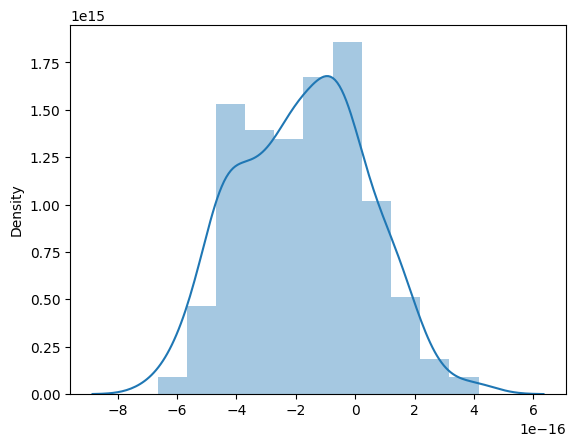

In [311]:
# Since the model looks good now, lets find if the Error\residue distribution follows a standard distribution before
# starting with the prediction

y_train_predict = lm.predict(X_train_new_sm)
residue = y_train - y_train_predict

sns.distplot(residue)
plt.show()

In [312]:
# The residual analysis plot though close to normal distribution but it does not look to be centered around zero. Now, dropping
# 'registered' variable which has highest VIF in remaining variable and rebuilding the model to evaluate further.

X_train_new  = X_train_new.drop('casual', axis=1)


In [313]:
# Rebuilding the model

X_train_new_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_new_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     639.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.36e-126
Time:                        15:04:44   Log-Likelihood:                 295.47
No. Observations:                 219   AIC:                            -578.9
Df Residuals:                     213   BIC:                            -558.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0106      0.011     -0.940      0.348      -0.033       0.012
registered             0.9864      0.018     54.076      0.000       0.950       1.022
thu                   -0.0208      0.013     -1.627      0.105      -0.046       0.004
fri                    0.0019      0.013      0.146      0.884      -0.024       0.028
sat                    0.1022      0.012      8.350      0.000       0.078       0.126
clearWithFewClouds     0.0249      0.009      2.673      0.008       0.007       0.043
==============================================================================
Omnibus:                       49.258   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.519
Skew:                           1.194   Prob(JB):                     7.31e-19
Kurtosis:                       4.859   Cond. No.                         6.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
# Lets drop 'fri' which has high p value of 0.884 after dropping 'casual' variable and recheck the model
X_train_new  = X_train_new.drop('fri', axis=1)

In [315]:
# Rebuilding the model

X_train_new_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_new_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     802.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.46e-127
Time:                        15:04:44   Log-Likelihood:                 295.46
No. Observations:                 219   AIC:                            -580.9
Df Residuals:                     214   BIC:                            -564.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0103      0.011     -0.931      0.353      -0.032       0.012
registered             0.9866      0.018     54.401      0.000       0.951       1.022
thu                   -0.0212      0.013     -1.693      0.092      -0.046       0.003
sat                    0.1018      0.012      8.497      0.000       0.078       0.125
clearWithFewClouds     0.0249      0.009      2.679      0.008       0.007       0.043
==============================================================================
Omnibus:                       48.991   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.718
Skew:                           1.190   Prob(JB):                     1.09e-18
Kurtosis:                       4.844   Cond. No.                         6.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [316]:
# Lets drop 'thu' which has high p value of 0.092 and recheck the model
X_train_new  = X_train_new.drop('thu', axis=1)

In [317]:
# Rebuilding the model

X_train_new_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_new_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1060.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.71e-128
Time:                        15:04:44   Log-Likelihood:                 294.01
No. Observations:                 219   AIC:                            -580.0
Df Residuals:                     215   BIC:                            -566.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0132      0.011     -1.199      0.232      -0.035       0.008
registered             0.9862      0.018     54.147      0.000       0.950       1.022
sat                    0.1054      0.012      8.892      0.000       0.082       0.129
clearWithFewClouds     0.0241      0.009      2.592      0.010       0.006       0.042
==============================================================================
Omnibus:                       52.435   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.464
Skew:                           1.244   Prob(JB):                     8.35e-21
Kurtosis:                       4.985   Cond. No.                         6.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
# Now all the remaining variables have p value less than 0.05

# Calculating VIF to decide which variables to drop further

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features   VIF
2  clearWithFewClouds  2.67
0          registered  2.59
1                 sat  1.13

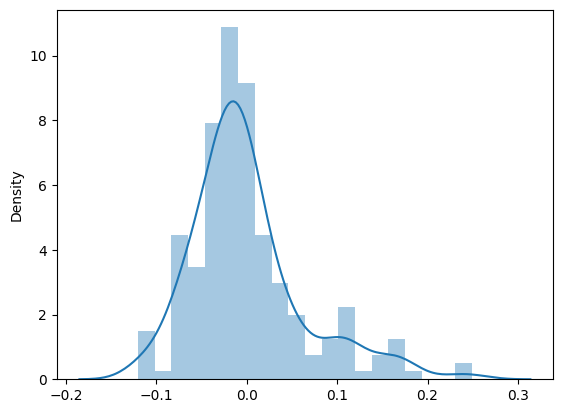

In [319]:
# Since the model is almost finalised now as all variables have p value less than 0.05 and VIF < 5% and model R^2 of 0.937
# and adjusted R^2 of 0.936 lets find if the Error\residue distribution follows a standard distribution before
# starting with the prediction

y_train_predict = lm.predict(X_train_new_sm)
residue = y_train - y_train_predict

sns.distplot(residue)
plt.show()

In [320]:
# The residual analysis indicates normal distribution and residual mean centered very close to 0 hence the model can be said
# to be good

# The formula for the best fit line for this model would be as below:
# cnt = -0.0132 + 0.9862*registered + 0.1054*sat + 0.0241*clearWithFewClouds

In [321]:
# Time to evaluate the model's efficacy with test dataset

# Create list of Numerical variables to scale. Note that the binary categorical variable converted to DUMMY numeric variables should not be scaled as 1 means True\Yes and 0 means False\No.
# With scaling of such variable we may loose their meaning and predictability
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# 2. Apply Transform on the test Data
boombikes_test[num_vars] = scaler.transform(boombikes_test[num_vars])
boombikes_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.852907  0.813304  0.678949   0.078074   
535   1        0           1  0.932384  0.893455  0.630167   0.148050   
299   0        0           1  0.487544  0.512699  0.865206   0.329739   
221   0        0           1  0.909846  0.841531  0.451450   0.335139   
152   0        0           1  0.836299  0.782324  0.324618   0.534310   

       casual  registered       cnt  ...  sun  mon  tue  wed  thu  fri  sat  \
184  1.011251    0.394093  0.707603  ...    0    1    0    0    0    0    0   
535  0.285572    0.757268  0.728786  ...    0    0    0    1    0    0    0   
299  0.076439    0.308106  0.280923  ...    0    0    0    0    1    0    0   
221  0.289543    0.535302  0.548355  ...    0    0    0    1    0    0    0   
152  0.240569    0.586987  0.572059  ...    0    0    0    0    1    0    0   

     clearWithFewClouds  mistyWithFewClouds  lightSnowRainCloudThunder  
184                   0                   1                          0  
535                   1                   0                          0  
299                   0                   1                          0  
221                   1                   0                          0  
152                   1                   0                          0  

[5 rows x 36 columns]

In [322]:
boombikes_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.510763    0.033268    0.673190    0.529510    0.543747    0.671171   
std      0.500374    0.179512    0.469507    0.262488    0.236334    0.153050   
min      0.000000    0.000000    0.000000   -0.097323   -0.032587    0.270516   
25%      0.000000    0.000000    0.000000    0.304864    0.343311    0.552339   
50%      1.000000    0.000000    1.000000    0.530249    0.557349    0.671410   
75%      1.000000    0.000000    1.000000    0.754448    0.734974    0.781168   
max      1.000000    1.000000    1.000000    1.045078    1.066458    1.035053   

        windspeed      casual  registered         cnt  ...         sun  \
count  511.000000  511.000000  511.000000  511.000000  ...  511.000000   
mean     0.308376    0.280866    0.499454    0.515664  ...    0.158513   
std      0.164944    0.230376    0.236537    0.241011  ...    0.365579   
min     -0.049804   -0.002316   -0.060914   -0.051570  ...    0.000000   
25%      0.192476    0.101423    0.331641    0.356449  ...    0.000000   
50%      0.288013    0.235606    0.499308    0.521750  ...    0.000000   
75%      0.403772    0.382197    0.662744    0.696633  ...    0.000000   
max      0.814264    1.125414    1.004461    1.044383  ...    1.000000   

              mon         tue         wed         thu         fri         sat  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.138943    0.154599    0.123288    0.142857    0.146771    0.135029   
std      0.346226    0.361876    0.329089    0.350270    0.354224    0.342090   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       clearWithFewClouds  mistyWithFewClouds  lightSnowRainCloudThunder  
count          511.000000          511.000000                 511.000000  
mean             0.626223            0.346380                   0.027397  
std              0.484280            0.476282                   0.163398  
min              0.000000            0.000000                   0.000000  
25%              0.000000            0.000000                   0.000000  
50%              1.000000            0.000000                   0.000000  
75%              1.000000            1.000000                   0.000000  
max              1.000000            1.000000                   1.000000  

[8 rows x 36 columns]

In [323]:
# Defining X and y for the test dataset
y_test = boombikes_test.pop("cnt")
X_test = boombikes_test

X_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.852907  0.813304  0.678949   0.078074   
535   1        0           1  0.932384  0.893455  0.630167   0.148050   
299   0        0           1  0.487544  0.512699  0.865206   0.329739   
221   0        0           1  0.909846  0.841531  0.451450   0.335139   
152   0        0           1  0.836299  0.782324  0.324618   0.534310   

       casual  registered  spring  ...  sun  mon  tue  wed  thu  fri  sat  \
184  1.011251    0.394093       0  ...    0    1    0    0    0    0    0   
535  0.285572    0.757268       0  ...    0    0    0    1    0    0    0   
299  0.076439    0.308106       0  ...    0    0    0    0    1    0    0   
221  0.289543    0.535302       0  ...    0    0    0    1    0    0    0   
152  0.240569    0.586987       0  ...    0    0    0    0    1    0    0   

     clearWithFewClouds  mistyWithFewClouds  lightSnowRainCloudThunder  
184                   0                   1                          0  
535                   1                   0                          0  
299                   0                   1                          0  
221                   1                   0                          0  
152                   1                   0                          0  

[5 rows x 35 columns]

In [324]:
#Keep same columns as X_train_new in the X_test_new dataframe
X_test_new = X_test[X_train_new.columns]

# Add constant
X_test_new_sm = sm.add_constant(X_test_new)

X_test_new_sm.head()

const  registered  sat  clearWithFewClouds
184    1.0    0.394093    0                   0
535    1.0    0.757268    0                   1
299    1.0    0.308106    0                   0
221    1.0    0.535302    0                   1
152    1.0    0.586987    0                   1

In [325]:
# Make prediction on the test data
y_test_predict= lm.predict(X_test_new_sm)

In [326]:
# Evaluate the prediction
r2_score(y_true=y_test, y_pred=y_test_predict)

# R Squared of the model was 0.937 and the R squared for predicted variable is 0.910. The test data R squared value is very near
# to the train dataset R squared value indicating that the model is able to generalize well on test data based on training
# data and is performing well.

0.9102860740606514

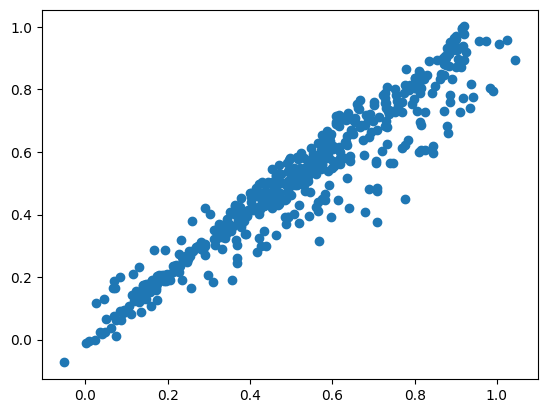

In [327]:
# Model evaluation
plt.scatter(y_test, y_test_predict)